In [1]:
#import sys
#!{sys.executable} -m pip install -r requirements.txt
#!{sys.executable} -m pip install importlib
#import time
#import matplotlib.pyplot as plt
#from inverse_thomson_scattering.v0 import form_factor as np_ff
#from inverse_thomson_scattering.jax import form_factor as jnp_ff
#from inverse_thomson_scattering.utils import plotting
import numpy as np
from scipy import special as sp
from importlib import reload

In [2]:
x = np.array(np.arange(-8, 8, 0.1))

# distf = 1 / (2 * np.pi) ** (1 / 2) * np.exp(-(x**5) / 2)
m = 2
const = np.sqrt(3*sp.gamma(3./m)/sp.gamma(5./m))
distf = np.exp(-(np.abs(x/const)**m))

norm = np.trapz(distf) * (x[2]-x[1])
distf = distf/norm

sa = np.linspace(55, 65, 10)

In [28]:
import yaml
with open("./inputs.yaml", "r") as fi:
  yaml_dict = yaml.safe_load(fi)

print(yaml_dict)

{'amp1': {'val': 1.0, 'active': True, 'lb': 0.0, 'ub': 10.0}, 'amp2': {'val': 1.0, 'active': True, 'lb': 0.0, 'ub': 10.0}, 'amp3': {'val': 1.0, 'active': True, 'lb': 0.0, 'ub': 10.0}, 'lam': {'val': 526.5, 'active': True, 'lb': 523.0, 'ub': 528.0}, 'Te': {'val': 0.5, 'active': True, 'lb': 0.01, 'ub': 3.0}, 'Ti': {'val': 0.2, 'active': True, 'lb': 0.01, 'ub': 3.0}, 'Z': {'val': 8.0, 'active': True, 'lb': 1.0, 'ub': 25.0}, 'A': {'val': 40, 'active': False}, 'ne': {'val': 0.2, 'active': True, 'lb': 0.001, 'ub': 10.0}, 'm': {'val': 2.0, 'active': True, 'lb': 2.0, 'ub': 5.0}, 'fe': {'val': [], 'active': False, 'length': 64, 'type': 'DLM', 'lb': -100.0, 'ub': -0.5}, 'blur': {'val': [], 'active': False, 'lb': 0.0, 'ub': 10.0}, 'specCurvature': {'val': [], 'active': False, 'lb': 0.1, 'ub': 10.0}, 'fitprops': {'val': [], 'active': False}}


{'amp1': {'val': 1.0, 'active': True, 'lb': 0.0, 'ub': 10.0}, 'amp2': {'val': 1.0, 'active': True, 'lb': 0.0, 'ub': 10.0}, 'amp3': {'val': 1.0, 'active': True, 'lb': 0.0, 'ub': 10.0}, 'lam': {'val': 526.5, 'active': True, 'lb': 523.0, 'ub': 528.0}, 'Te': {'val': 0.5, 'active': True, 'lb': 0.01, 'ub': 3.0}, 'Ti': {'val': 0.2, 'active': True, 'lb': 0.01, 'ub': 3.0}, 'Z': {'val': 8.0, 'active': True, 'lb': 1.0, 'ub': 25.0}, 'A': {'val': 40, 'active': False}, 'ne': {'val': 0.2, 'active': True, 'lb': 0.001, 'ub': 10.0}, 'm': {'val': 2.0, 'active': True, 'lb': 2.0, 'ub': 5.0}, 'fe': {'val': DeviceArray([-25.41788548, -25.39337628, -25.36888404, ..., -25.37587738,
             -25.40037313, -25.42488583], dtype=float64), 'active': False, 'length': 64, 'type': 'DLM', 'lb': array([-100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., 

ValueError: too many values to unpack (expected 2)

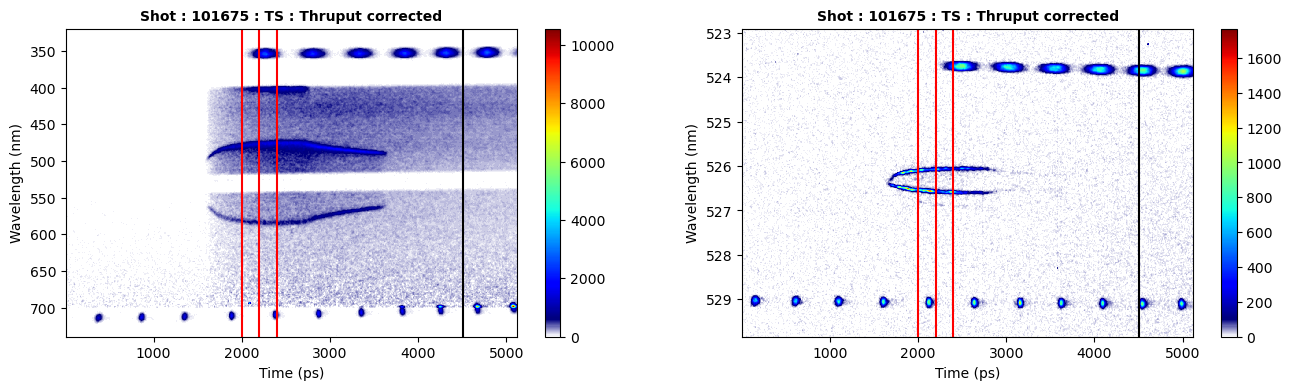

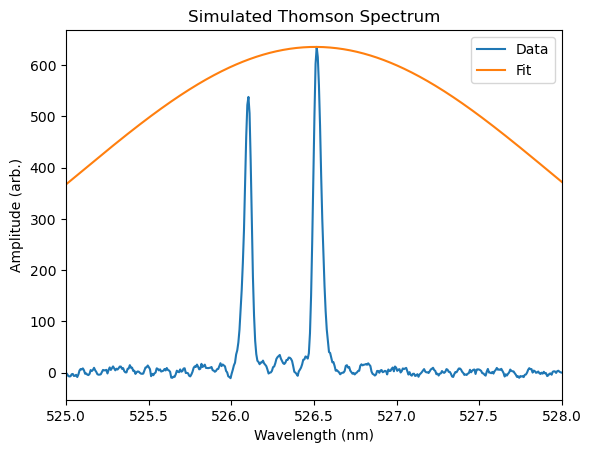

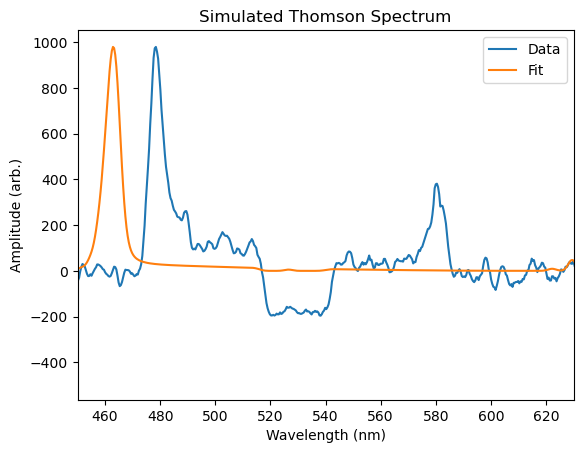

In [29]:
from inverse_thomson_scattering.v0 import datafitter
datafitter=reload(datafitter)
bgshot={'type': [], 'val': []}
lnout={'type': 'ps', 'val': [2000, 2200, 2400]}
bglnout={'type': 'pixel', 'val': 900}
extraoptions={'spectype': 2}
dfres=datafitter.dattafitter(101675,bgshot,lnout,bglnout,1,2,yaml_dict,extraoptions)

In [ ]:
with open("./inputs.yaml", "r") as fi:
  yaml_dict = yaml.safe_load(fi)

yaml_dict['lam']={'val': 525.53, 'active': False}
datafitter.dattafitter(101675,bgshot,lnout,bglnout,1,2,yaml_dict,extraoptions)

with open("./inputs.yaml", "r") as fi:
  yaml_dict = yaml.safe_load(fi)

yaml_dict['m']={'val': 2.627, 'active': False}
datafitter.dattafitter(101675,bgshot,lnout,bglnout,1,2,yaml_dict,extraoptions)

with open("./inputs.yaml", "r") as fi:
  yaml_dict = yaml.safe_load(fi)

yaml_dict['Te']={'val': 0.47546, 'active': False}
datafitter.dattafitter(101675,bgshot,lnout,bglnout,1,2,yaml_dict,extraoptions)

with open("./inputs.yaml", "r") as fi:
  yaml_dict = yaml.safe_load(fi)

yaml_dict['ne']={'val': 0.22306, 'active': False}
datafitter.dattafitter(101675,bgshot,lnout,bglnout,1,2,yaml_dict,extraoptions)

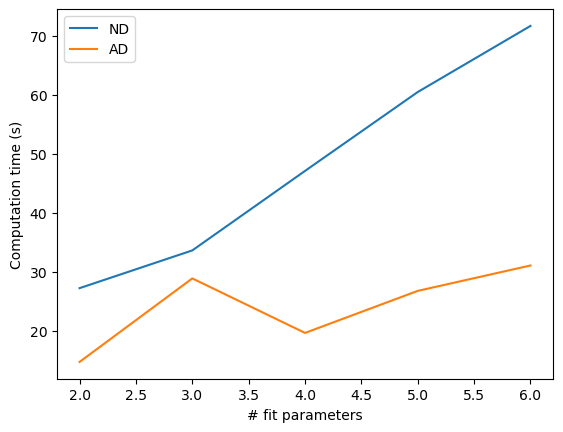

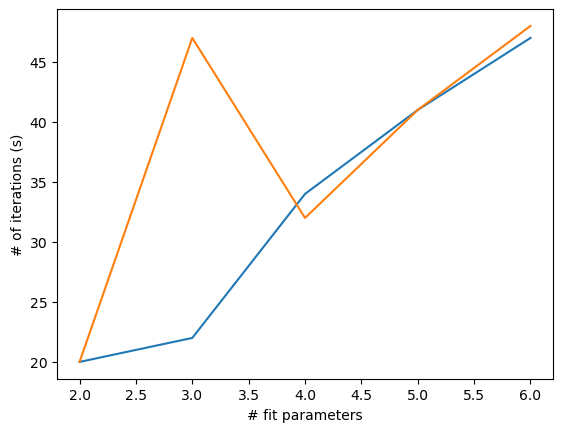

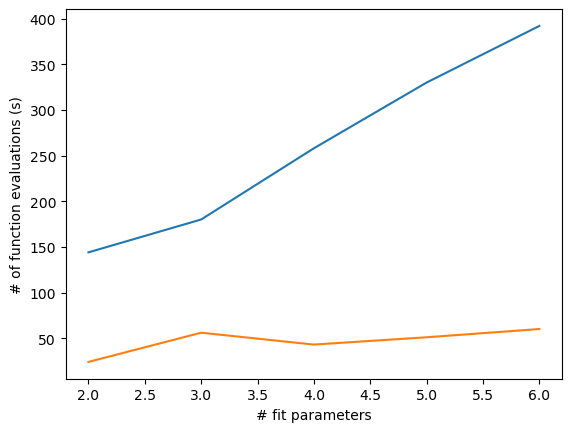

In [6]:
n=[6, 5, 4, 3, 2]
ndtime=[71.65, 60.46, 47.1, 33.64, 27.25]
ndit=[47, 41, 34, 22, 20]
ndfev=[392, 330, 258, 180, 144]
adtime=[31.09, 26.79, 19.67, 28.9, 14.76]
adit=[48, 41, 32, 47, 20]
adfev=[60, 51, 43, 56, 24]

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(1, sharex=True)
ax1.plot(n,ndtime)
ax1.plot(n,adtime)
fig, ax2 = plt.subplots(1, sharex=True)
ax2.plot(n,ndit)
ax2.plot(n,adit)
fig, ax3 = plt.subplots(1, sharex=True)
ax3.plot(n,ndfev)
ax3.plot(n,adfev)

#ax1.set_title(title)
ax1.set_ylabel('Computation time (s)')
ax2.set_ylabel('# of iterations (s)')
ax3.set_ylabel('# of function evaluations (s)')
ax1.set_xlabel('# fit parameters')
ax2.set_xlabel('# fit parameters')
ax3.set_xlabel('# fit parameters')
ax1.legend({'ND','AD'})


In [ ]:
print(test['test2'])
test2['type']='shot'
print(test['test2'])

In [ ]:
def test3(*args):
    print(args[2])
test3(1,2,3)

In [ ]:
a=np.array([1,2,3,4])
b=np.array([[1],[2]])
b=np.append(b,b,axis=1)
print(a)
print(b)
c= a < 3
print(a[c])

In [ ]:
a=np.ones([2,5])
b=np.array([[-100],[-.5]])
print(a*b)
print(np.shape(a*b)[1])
print(type(a)=='np.ndarray')
print(isinstance(a,np.ndarray))

In [ ]:
a=tuple([1,(3999,)])
print(a[1:])

In [ ]:
if [1, 2]: print('True')

In [ ]:
a=np.arange(2048)
a=a.reshape(-1,1024)
print(a)
print(np.shape(a[0,:]))
b=np.average(a, axis=1)
print(b)

In [ ]:
a=[]
np.shape(a)
if np.shape(a)[0]==0: print('empty')

In [ ]:
x=np.arange(6)
a = x < 4
print(a)
b = x > 2
print(b)
c = (a & b)
print(c)

In [ ]:
a=[];b=[]
print( a)

In [ ]:
a=[np.array([9.94273190e-01, 6.18536697e-01, 5.25531127e+02, 4.75461203e-01,
       2.23061157e-01, 2.62748559e+00]), np.array([9.87527937e-01, 6.35626483e-01, 5.25353780e+02, 5.91172474e-01,
       2.27760475e-01, 3.12198002e+00]), np.array([1.02548826e+00, 6.56723745e-01, 5.25373431e+02, 6.51366471e-01,
       2.21577559e-01, 2.97616728e+00])]
print(a)
b=np.array(a)
b[:,2]